In [31]:
# Standard 
import os, sys , copy ,shutil, logging, csv, json, logging
logger = logging.getLogger()
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from scipy import optimize


# Import all the streamm modules
from streamm import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
os.chdir('/Users/tkemper/Projects/DApolymers/notebooks')

In [33]:
def find_DA(calc_i):
    

    calc_i.strucC.propcompile_particles()
    part_df =  pd.DataFrame(calc_i.strucC.prop_particles)

    ress = []    
    for res_i in  part_df['resname']:
        if( res_i not in ress ):
            ress.append(res_i)
            print res_i
    res_D = None
    res_A = None
    for res_i in ress:
        if( res_i[:1] == 'D' ):
            res_D = res_i
        if( res_i[:1] == 'A' ):
            res_A = res_i
    if( res_D == None or res_A == None ):
        print " Search failed"
        

    return part_df,res_D,res_A
    

In [34]:
def make_rdfcalc(calc_ref,proj_tag):
    tag_i = '%s_%s'%(calc_ref.tag,proj_tag)
    tag_i = tag_i.replace('_rdf1','')
    calc_i = calculation.CalculationRes(tag_i)
    
    calc_i.properties['name'] = calc_ref.properties['name']
    calc_i.files['input']['cply'] = calc_ref.files['input']['cply']
    
    os.chdir(calc_ref.dir['launch'])
    calc_i.strucC.read_cply(calc_i.files['input']['cply'])
    

    calc_i.set_resource(peregrine)
    calc_i.properties['scratch'] = calc_i.dir['scratch']
    calc_i.dir['templates'] = '/Users/tkemper/Development/streamm-tools/templates'
    calc_i.dir['scripts'] = '/Users/tkemper/Development/streamm-tools/scripts'    

    calc_i.make_dir()
    
    os.chdir(calc_i.dir['launch'])
    # calc_i.add_refcalc(calc_ref)
    # return calc_i

    calc_i.strucC.write_cply()

    calc_i.strucC.write_xyz()
    
    return calc_i



In [35]:
local = resource.Resource('local')
local.load_json()

peregrine = resource.Resource('peregrine')
peregrine.load_json()

Reading in resource json file res_local.json 
Reading in resource json file res_peregrine.json 


In [40]:
print peregrine.dir['home']

/Users/tkemper/Projects/DApolymers


In [36]:
peregrine.properties['queue'] = 'batch'
peregrine.properties['walltime'] = 48
peregrine.properties['feature'] = '24core'
peregrine.properties['ppn'] = 24
peregrine.properties['nproc'] = 24

print peregrine.properties

{u'allocation': u'orgopv', u'scratch': u'/scratch/tkemper', u'ppn': 24, u'feature': '24core', u'queue': 'batch', u'e-mail': u'travis.kemper@nrel.gov', u'exe_command': u'qsub ', u'nproc': 24, u'nodes': 1, u'pmem': 1500, u'walltime': 48}


In [37]:
proj_tag = 'rdf4'
proj_i = project.Project('DAPpolymers_%s'%(proj_tag))
proj_i.load_json()

Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 


In [38]:
ref_proj_tag = 'rdf1'
proj_ref = project.Project('DAPpolymers_%s'%(ref_proj_tag))
proj_ref.load_json()

Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 


In [39]:
for tag,calc_i in proj_ref.calculations.iteritems():
    print tag
    print calc_i.dir['launch']

D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_rdf1
/Users/tkemper/Projects/DApolymers/scratch/D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_rdf1/
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_rdf1
/Users/tkemper/Projects/DApolymers/scratch/D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_rdf1/
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_rdf1
/Users/tkemper/Projects/DApolymers/scratch/D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_rdf1/
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_rdf1
/Users/tkemper/Projects/DApolymers/scratch/D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_rdf1/
D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_rdf1
/Users/tkemper/Projects/DApolymers/scratch/D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_rdf1/
D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_rdf1
/Users/tkemper/Projects/DApolymers/scratch/D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_rdf1/


In [124]:
prod1_proj_tag = 'prod1'
proj_prod1 = project.Project('DAPpolymers_%s'%(prod1_proj_tag))
proj_prod1.load_json()

Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 


In [8]:
for tag_i,calc_ref in proj_ref.calculations.iteritems():
    print tag_i,calc_ref.meta['status'],calc_ref.properties['name']

D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_rdf1 written BDT-TPD
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_rdf1 written PCE10
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_rdf1 written PTB7
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_rdf1 written PTB4
D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_rdf1 written PTB1
D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_rdf1 written PTB5


In [ ]:
for tag,calc_ref in proj_ref.calculations.iteritems():
    print tag
    calc_i = make_rdfcalc(calc_ref,proj_tag)
    proj_i.calculations[calc_i.tag] = copy.deepcopy(calc_i)

In [ ]:
for tag,calc_i in proj_i.calculations.iteritems():
    print tag
    calc_i.meta['status']  = 'written'
    calc_i.set_resource(peregrine)
    calc_i.properties['scratch'] = calc_i.dir['scratch']



    print calc_i.meta['status'] 

In [ ]:
for tag,calc_i in proj_i.calculations.iteritems():
    print tag
    if( calc_i.meta['status'] != 'running' ):
        os.chdir(calc_i.dir['launch'])

        part_df,res_D,res_A = find_DA(calc_i)

        print res_D,res_A

        sel_D = part_df['resname'] == res_D
        sel_A = part_df['resname'] == res_A
        sel_THIO = part_df['resname'] == 'THIO'

        syC = part_df['symbol'] == 'C'
        syS = part_df['symbol'] == 'S'
        syN = part_df['symbol'] == 'N'
        ffO = part_df['fftype'] == 'O'    

        calc_i.sel_DA = part_df[(syC | syS  |syN ) & (sel_D | sel_A )]
        calc_i.strucC.write_xyz_list(calc_i.sel_DA.index,'sel_DA.xyz')    
        calc_i.sel_D = part_df[(syC | syS  |syN ) & (sel_D  )]
        calc_i.strucC.write_xyz_list(calc_i.sel_D.index,'sel_D.xyz')    
        calc_i.sel_A = part_df[(syC | syS  |syN ) & ( sel_A )]
        calc_i.strucC.write_xyz_list(calc_i.sel_A.index,'sel_A.xyz')    

        file_DA = calc_i.strucC.write_list(calc_i.sel_DA.index,'DA')
        file_D = calc_i.strucC.write_list(calc_i.sel_D.index,'D')
        file_A = calc_i.strucC.write_list(calc_i.sel_A.index,'A')    



In [11]:
for tag,calc_i in proj_i.calculations.iteritems():
        print tag

        calc_i.files['input']['file_DA'] = 'DA.list'
        calc_i.files['input']['file_D'] = 'D.list'
        calc_i.files['input']['file_A'] = 'A.list'

D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_rdf4
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_rdf4
D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_rdf4
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_rdf4
D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_rdf4
D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_rdf4


In [12]:
for tag,calc_i in proj_i.calculations.iteritems():
    print tag

    calc_i.dir['templates'] = '/Users/tkemper/Development/streamm-tools/templates'
    calc_i.dir['scripts'] = '/Users/tkemper/Development/streamm-tools/scripts'    



D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_rdf4
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_rdf4
D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_rdf4
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_rdf4
D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_rdf4
D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_rdf4


In [13]:
for tag,calc_i in proj_i.calculations.iteritems():
    print tag
    #if( calc_i.meta['status'] != 'running' ):

    os.chdir(calc_i.dir['launch'])

    file_type = 'templates'
    file_key = 'run'
    file_name = "streamm_peregrine.pbs"
    from_dirkey = 'templates'
    to_dirkey = 'launch'
    calc_i.cp_file(file_type,file_key,file_name,from_dirkey,to_dirkey)

    file_type = 'input'
    file_key = 'py_script'
    file_name = "rdf2.py"
    from_dirkey = 'scripts'
    to_dirkey = 'launch'
    calc_i.cp_file(file_type,file_key,file_name,from_dirkey,to_dirkey)



D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_rdf4
> in cp_file  templates run streamm_peregrine.pbs templates launch
copying /Users/tkemper/Development/streamm-tools/templates/streamm_peregrine.pbs to /Users/tkemper/Projects/DApolymers/scratch/D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_rdf4/streamm_peregrine.pbs 
> in cp_file  input py_script rdf2.py scripts launch
copying /Users/tkemper/Development/streamm-tools/scripts/rdf2.py to /Users/tkemper/Projects/DApolymers/scratch/D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_rdf4/rdf2.py 
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_rdf4
> in cp_file  templates run streamm_peregrine.pbs templates launch
copying /Users/tkemper/Development/streamm-tools/templates/streamm_peregrine.pbs to /Users/tkemper/Projects/DApolymers/scratch/D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_rdf4/streamm_peregrine.pbs 
> in cp_file  input py_script rdf2.py scripts launch
copying /Users/tkemper/D

In [75]:
for tag,calc_i in proj_i.calculations.iteritems():
    print tag,calc_i.meta['status']
    calc_i.properties['frame_step'] = 100 



D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_rdf4 running
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_rdf4 running
D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_rdf4 running
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_rdf4 running
D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_rdf4 running
D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_rdf4 running


In [16]:
for tag,calc_i in proj_i.calculations.iteritems():
        print tag
        # if( calc_i.meta['status'] != 'running' ):


        os.chdir(calc_i.dir['launch'])

        calc_i.properties['streamm_command'] = ' \n'

        run_tag = "D_D_fs%d"%(calc_i.properties['frame_step'])
        calc_i.properties['streamm_command'] = 'python %s  %s --cply %s'%(calc_i.files['input']['py_script'],run_tag,calc_i.files['input']['cply'])
        calc_i.properties['streamm_command'] += ' --list_i %s '%(calc_i.files['input']['file_D'])
        calc_i.properties['streamm_command'] += ' --list_j %s '%(calc_i.files['input']['file_D'])
        calc_i.properties['streamm_command'] += ' --dcd prod1_dump.dcd'
        calc_i.properties['streamm_command'] += ' --mol_inter'
        calc_i.properties['streamm_command'] += ' --frame_step %d'%(calc_i.properties['frame_step'])

        calc_i.files['output']["%s_log"%(run_tag)] = "%s.log"%(run_tag)
        calc_i.files['output']["%s_data"%(run_tag)] = "%s.dat"%(run_tag)

        print calc_i.properties['streamm_command']    


        calc_i.load_str('templates','run')
        calc_i.replacewrite_prop('run','scripts','run_%s'%(run_tag),'%s.pbs'%(run_tag))


        calc_i.properties['finish_str'] ='Finished'



        calc_i.properties['streamm_command'] = ' \n'
        run_tag = "D_A_fs%d"%(calc_i.properties['frame_step'])
        calc_i.properties['streamm_command'] += 'python %s  %s --cply %s'%(calc_i.files['input']['py_script'],run_tag,calc_i.files['input']['cply'])
        calc_i.properties['streamm_command'] += ' --list_i %s '%(calc_i.files['input']['file_D'])
        calc_i.properties['streamm_command'] += ' --list_j %s '%(calc_i.files['input']['file_A'])
        calc_i.properties['streamm_command'] += ' --dcd prod1_dump.dcd'
        calc_i.properties['streamm_command'] += ' --mol_inter'
        calc_i.properties['streamm_command'] += ' --frame_step %d'%(calc_i.properties['frame_step'])
        calc_i.files['output']["%s_log"%(run_tag)] = "%s.log"%(run_tag)
        calc_i.files['output']["%s_data"%(run_tag)] = "%s.dat"%(run_tag)


        print calc_i.properties['streamm_command']    


        calc_i.load_str('templates','run')
        calc_i.replacewrite_prop('run','scripts','run_%s'%(run_tag),'%s.pbs'%(run_tag))


        calc_i.properties['finish_str'] ='Finished'


        calc_i.properties['streamm_command'] = ' \n'
        run_tag = "A_A_fs%d"%(calc_i.properties['frame_step'])
        calc_i.properties['streamm_command'] += 'python %s  %s --cply %s'%(calc_i.files['input']['py_script'],run_tag,calc_i.files['input']['cply'])
        calc_i.properties['streamm_command'] += ' --list_i %s '%(calc_i.files['input']['file_A'])
        calc_i.properties['streamm_command'] += ' --list_j %s '%(calc_i.files['input']['file_A'])
        calc_i.properties['streamm_command'] += ' --dcd prod1_dump.dcd'
        calc_i.properties['streamm_command'] += ' --mol_inter'
        calc_i.properties['streamm_command'] += ' --frame_step %d'%(calc_i.properties['frame_step'])
        
        calc_i.files['output']["%s_log"%(run_tag)] = "%s.log"%(run_tag)
        calc_i.files['output']["%s_data"%(run_tag)] = "%s.dat"%(run_tag)


        print calc_i.properties['streamm_command']    


        calc_i.load_str('templates','run')
        calc_i.replacewrite_prop('run','scripts','run_%s'%(run_tag),'%s.pbs'%(run_tag))


        calc_i.properties['finish_str'] ='Finished'

        
        #return prod1_et

D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_rdf4
python rdf2.py  D_D_fs100 --cply D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173.cply --list_i D.list  --list_j D.list  --dcd prod1_dump.dcd --mol_inter --frame_step 100
 
python rdf2.py  D_A_fs100 --cply D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173.cply --list_i D.list  --list_j A.list  --dcd prod1_dump.dcd --mol_inter --frame_step 100
 
python rdf2.py  A_A_fs100 --cply D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173.cply --list_i A.list  --list_j A.list  --dcd prod1_dump.dcd --mol_inter --frame_step 100
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_rdf4
python rdf2.py  D_D_fs100 --cply D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193.cply --list_i D.list  --list_j D.list  --dcd prod1_dump.dcd --mol_inter --frame_step 100
 
python rdf2.py  D_A_fs100 --cply D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193.cply --list_i D.list  --list_j A.list  --dcd prod1_dump.dcd --mol_inter --frame_step 100

In [26]:
for tag,calc_i in proj_i.calculations.iteritems():
    run_tag = "A_A_fs%d"%(calc_i.properties['frame_step'])
    calc_i.files['output']["log"] = "%s.log"%(run_tag)




In [ ]:
for tag,calc_i in proj_i.calculations.iteritems():
    try:
        del calc_i.files['scripts']['py_script']
    except:
        print "meh"

In [ ]:
for tag,calc_i in proj_i.calculations.iteritems():
    print calc_i.files['scripts']

In [ ]:
os.chdir(calc_i.dir['home'])

In [ ]:
proj_prod1_id = 'prod1'
proj_prod1 = project.Project('DAPpolymers_%s'%(proj_prod1_id))
proj_prod1.load_json()

In [ ]:
for tag,calc_prod1 in proj_prod1.calculations.iteritems():
    print calc_prod1.tag #,calc_prod1.properties['name']

In [ ]:
for tag,calc_i in proj_i.calculations.iteritems():

    print calc_i.tag

In [ ]:
calc_i = proj_i.calculations['D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_rdf4']
calc_i.add_refcalc(proj_prod1.calculations['D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1'])
calc_i = proj_i.calculations['D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_rdf4']
calc_i.add_refcalc(proj_prod1.calculations['D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1'])
calc_i = proj_i.calculations['D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_rdf4']
calc_i.add_refcalc(proj_prod1.calculations['D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1'])
calc_i = proj_i.calculations['D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_rdf4']
calc_i.add_refcalc(proj_prod1.calculations['D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1'])
calc_i = proj_i.calculations['D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_rdf4']
calc_i.add_refcalc(proj_prod1.calculations['D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1'])
calc_i = proj_i.calculations['D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_rdf4']
calc_i.add_refcalc(proj_prod1.calculations['D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1'])

In [ ]:
for tag_i,calc_ref in proj_ref.calculations.iteritems():
    print tag_i,calc_ref.meta['status'],calc_ref.properties['name']

In [ ]:
for tag,calc_i in proj_i.calculations.iteritems():
    print tag
    #if( calc_i.meta['status'] != 'running' ):
    calc_i.meta['status'] = 'written'
    os.chdir(calc_i.dir['launch'])

    calc_i.push()

In [ ]:
for tag,calc_i in proj_i.calculations.iteritems():
    print tag
    if( calc_i.meta['status'] != 'running' ):
        calc_i.run()

        calc_i.meta['status'] = 'running'
        print calc_i.meta['status']  

        os.chdir(calc_i.dir['home'])
        calc_i.dump_json()        

In [ ]:
for tag,calc_i in proj_i.calculations.iteritems():

        os.chdir(calc_i.dir['home'])
        calc_i.dump_json()   
        
os.chdir(calc_i.dir['home'])
proj_i.dump_json()

Add other RDFs 

In [17]:
calc_i = proj_i.calculations['D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_rdf4']

In [18]:
    calc_i.meta['status'] = 'written'

In [19]:
        os.chdir(calc_i.dir['launch'])

In [ ]:
        part_df,res_D,res_A = find_DA(calc_i)

        sel_D = part_df['resname'] == res_D
        sel_A = part_df['resname'] == res_A
        sel_THIO = part_df['resname'] == 'THIO'

        syC = part_df['symbol'] == 'C'
        syS = part_df['symbol'] == 'S'
        syN = part_df['symbol'] == 'N'
        ffO = part_df['fftype'] == 'O'   
        
        ffO = part_df['fftype'] == 'O'    
        ffS = part_df['fftype'] == 'S'        
        ffNS = part_df['fftype'] == 'NS'   

In [ ]:
    calc_i.sel_AffO = part_df[( ffO ) & ( sel_A )]
    calc_i.strucC.write_xyz_list(calc_i.sel_AffO.index,'sel_AffO.xyz')   
    file_AffO = calc_i.strucC.write_list(calc_i.sel_AffO.index,'AffO')    
    calc_i.files['input']['file_AffO'] = file_AffO   

    calc_i.sel_AffS = part_df[( ffS ) & ( sel_A )]
    calc_i.strucC.write_xyz_list(calc_i.sel_AffS.index,'sel_AffS.xyz')   
    file_AffS = calc_i.strucC.write_list(calc_i.sel_AffS.index,'AffS')    
    calc_i.files['input']['file_AffS'] = file_AffS   

    calc_i.sel_AffNS = part_df[( ffNS ) & ( sel_A )]
    calc_i.strucC.write_xyz_list(calc_i.sel_AffNS.index,'sel_AffNS.xyz')   
    file_AffNS = calc_i.strucC.write_list(calc_i.sel_AffNS.index,'AffNS')    
    calc_i.files['input']['file_AffNS'] = file_AffNS   

In [ ]:
    calc_i.files['scripts_t'] =  calc_i.files['scripts']

In [ ]:
    del  calc_i.files['scripts']

In [ ]:
    calc_i.files['scripts'] = {}

In [ ]:
    print  calc_i.files['scripts']

In [ ]:
        calc_i.properties['streamm_command'] = ' \n'

        run_tag = "AffO_AffO_fs%d"%(calc_i.properties['frame_step'])
        calc_i.properties['streamm_command'] = 'python %s  %s --cply %s'%(calc_i.files['input']['py_script'],run_tag,calc_i.files['input']['cply'])
        calc_i.properties['streamm_command'] += ' --list_i %s '%(calc_i.files['input']['file_AffO'])
        calc_i.properties['streamm_command'] += ' --list_j %s '%(calc_i.files['input']['file_AffO'])
        calc_i.properties['streamm_command'] += ' --dcd prod1_dump.dcd'
        calc_i.properties['streamm_command'] += ' --mol_inter'
        calc_i.properties['streamm_command'] += ' --frame_step %d'%(calc_i.properties['frame_step'])

        calc_i.files['output']["%s_log"%(run_tag)] = "%s.log"%(run_tag)
        calc_i.files['output']["%s_data"%(run_tag)] = "%s.dat"%(run_tag)

        print calc_i.properties['streamm_command']    


        calc_i.load_str('templates','run')
        calc_i.replacewrite_prop('run','scripts','run_%s'%(run_tag),'%s.pbs'%(run_tag))


        calc_i.properties['finish_str'] ='Finished'

        run_tag = "AffS_AffS_fs%d"%(calc_i.properties['frame_step'])
        calc_i.properties['streamm_command'] = 'python %s  %s --cply %s'%(calc_i.files['input']['py_script'],run_tag,calc_i.files['input']['cply'])
        calc_i.properties['streamm_command'] += ' --list_i %s '%(calc_i.files['input']['file_AffS'])
        calc_i.properties['streamm_command'] += ' --list_j %s '%(calc_i.files['input']['file_AffS'])
        calc_i.properties['streamm_command'] += ' --dcd prod1_dump.dcd'
        calc_i.properties['streamm_command'] += ' --mol_inter'
        calc_i.properties['streamm_command'] += ' --frame_step %d'%(calc_i.properties['frame_step'])

        calc_i.files['output']["%s_log"%(run_tag)] = "%s.log"%(run_tag)
        calc_i.files['output']["%s_data"%(run_tag)] = "%s.dat"%(run_tag)

        print calc_i.properties['streamm_command']    


        calc_i.load_str('templates','run')
        calc_i.replacewrite_prop('run','scripts','run_%s'%(run_tag),'%s.pbs'%(run_tag))


        calc_i.properties['finish_str'] ='Finished'


        run_tag = "AffNS_AffNS_fs%d"%(calc_i.properties['frame_step'])
        calc_i.properties['streamm_command'] = 'python %s  %s --cply %s'%(calc_i.files['input']['py_script'],run_tag,calc_i.files['input']['cply'])
        calc_i.properties['streamm_command'] += ' --list_i %s '%(calc_i.files['input']['file_AffNS'])
        calc_i.properties['streamm_command'] += ' --list_j %s '%(calc_i.files['input']['file_AffNS'])
        calc_i.properties['streamm_command'] += ' --dcd prod1_dump.dcd'
        calc_i.properties['streamm_command'] += ' --mol_inter'
        calc_i.properties['streamm_command'] += ' --frame_step %d'%(calc_i.properties['frame_step'])

        calc_i.files['output']["%s_log"%(run_tag)] = "%s.log"%(run_tag)
        calc_i.files['output']["%s_data"%(run_tag)] = "%s.dat"%(run_tag)

        print calc_i.properties['streamm_command']    


        calc_i.load_str('templates','run')
        calc_i.replacewrite_prop('run','scripts','run_%s'%(run_tag),'%s.pbs'%(run_tag))


        calc_i.properties['finish_str'] ='Finished'






In [21]:
        run_tag = "AffO_AffO_fs%d"%(calc_i.properties['frame_step'])

        calc_i.files['output']["%s_log"%(run_tag)] = "%s.log"%(run_tag)
        calc_i.files['output']["%s_data"%(run_tag)] = "%s.dat"%(run_tag)

        run_tag = "AffS_AffS_fs%d"%(calc_i.properties['frame_step'])

        calc_i.files['output']["%s_log"%(run_tag)] = "%s.log"%(run_tag)
        calc_i.files['output']["%s_data"%(run_tag)] = "%s.dat"%(run_tag)

        run_tag = "AffNS_AffNS_fs%d"%(calc_i.properties['frame_step'])

        calc_i.files['output']["%s_log"%(run_tag)] = "%s.log"%(run_tag)
        calc_i.files['output']["%s_data"%(run_tag)] = "%s.dat"%(run_tag)

In [ ]:
    calc_i.push()

In [ ]:
    print calc_i.files['scripts']

In [ ]:
    calc_i.run()

    Add scripts back in 

In [ ]:
    calc_i.files['scripts'].update(calc_i.files['scripts_t'])

In [ ]:
    print calc_i.files['scripts']

In [27]:
for tag,calc_i in proj_i.calculations.iteritems():
    print tag
    os.chdir(calc_i.dir['launch'])
    calc_i.check()

D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_rdf4
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_rdf4
D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_rdf4
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_rdf4
D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_rdf4
D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_rdf4


In [28]:
for tag,calc_i in proj_i.calculations.iteritems():
    print calc_i.meta['status']

finished
finished
finished
finished
finished
finished


In [29]:
for tag,calc_i in proj_i.calculations.iteritems():
    print tag
    os.chdir(calc_i.dir['launch'])
    calc_i.store()

D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_rdf4
runnning store function in /Users/tkemper/Projects/DApolymers/scratch/D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_rdf4 
Storing input files 
Adding D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173.cply 
Adding rdf2.py 
Adding D.list 
Adding DA.list 
Adding A.list 
> compressed_file  D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_rdf4_input.tgz
ssh tkemper@peregrine.hpc.nrel.gov ' cd /scratch/tkemper/D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_rdf4/ ; tar -czf  D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_rdf4_input.tgz  D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173.cply rdf2.py D.list DA.list A.list  ' 
ssh tkemper@peregrine.hpc.nrel.gov ' cd /scratch/tkemper/D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_rdf4/ ; cp /scratch/tkemper/D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_rdf4/D51_00R300R3_A

In [30]:
for tag,calc_i in proj_i.calculations.iteritems():
    print tag
    os.chdir(calc_i.dir['launch'])
    calc_i.pull()

D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_rdf4
output D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_rdf4_output.tgz
bash_command  scp tkemper@peregrine.hpc.nrel.gov:/scratch/tkemper/D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_rdf4/D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_rdf4_output.tgz /Users/tkemper/Projects/DApolymers/scratch/D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_rdf4/ 


No commpressed files for file type data with key compressed 
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_rdf4
output D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_rdf4_output.tgz
bash_command  scp tkemper@peregrine.hpc.nrel.gov:/scratch/tkemper/D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_rdf4/D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_rdf4_output.tgz /Users/tkemper/Projects/DApolymers/scratch/D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_rdf4/ 


No commpressed files for file type data with key compressed 
D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_rdf4
output D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_rdf4_output.tgz
bash_command  scp tkemper@peregrine.hpc.nrel.gov:/scratch/tkemper/D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_rdf4/D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_rdf4_output.tgz /Users/tkemper/Projects/DApolymers/scratch/D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_rdf4/ 


No commpressed files for file type data with key compressed 
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_rdf4
output D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_rdf4_output.tgz
bash_command  scp tkemper@peregrine.hpc.nrel.gov:/scratch/tkemper/D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_rdf4/D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_rdf4_output.tgz /Users/tkemper/Projects/DApolymers/scratch/D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_rdf4/ 


No commpressed files for file type data with key compressed 
D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_rdf4
output D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_rdf4_output.tgz
bash_command  scp tkemper@peregrine.hpc.nrel.gov:/scratch/tkemper/D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_rdf4/D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_rdf4_output.tgz /Users/tkemper/Projects/DApolymers/scratch/D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_rdf4/ 


No commpressed files for file type data with key compressed 
D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_rdf4
output D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_rdf4_output.tgz
bash_command  scp tkemper@peregrine.hpc.nrel.gov:/scratch/tkemper/D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_rdf4/D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_rdf4_output.tgz /Users/tkemper/Projects/DApolymers/scratch/D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_rdf4/ 


No commpressed files for file type data with key compressed 


In [83]:
name_l = []
name_l.append('BDT-TPD')
name_l.append('PTB1')
name_l.append('PTB5')
name_l.append('PTB4')
name_l.append('PTB7')
name_l.append('PCE10')

In [31]:
for tag,calc_i in proj_i.calculations.iteritems():
    print tag

D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_rdf4
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_rdf4
D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_rdf4
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_rdf4
D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_rdf4
D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_rdf4


In [78]:
def read_dat(data_file):
    f = open(data_file,'r')
    lines = f.readlines()
    rdf = {}
    rdf['r'] = []
    rdf['g_r'] = []
    rdf['g_r_nn'] = []    
    for line in  lines:
        col = line.split()
        if( col[0] != '#' ):
            rdf['r'].append(float(col[0]))
            rdf['g_r'].append(float(col[1]))
            rdf['g_r_nn'].append(float(col[2]))
    
    return rdf

In [50]:
for tag,calc_i in proj_i.calculations.iteritems():
    os.chdir(calc_i.dir['launch'])
    calc_i.rdf_DA = read_dat(calc_i.files['output']['D_A_fs100_data'])
    calc_i.rdf_DD = read_dat(calc_i.files['output']['D_D_fs100_data'])
    calc_i.rdf_AA = read_dat(calc_i.files['output']['A_A_fs100_data'])    

BDT-TPD
PTB1
PTB5
PTB4
PTB7
PCE10


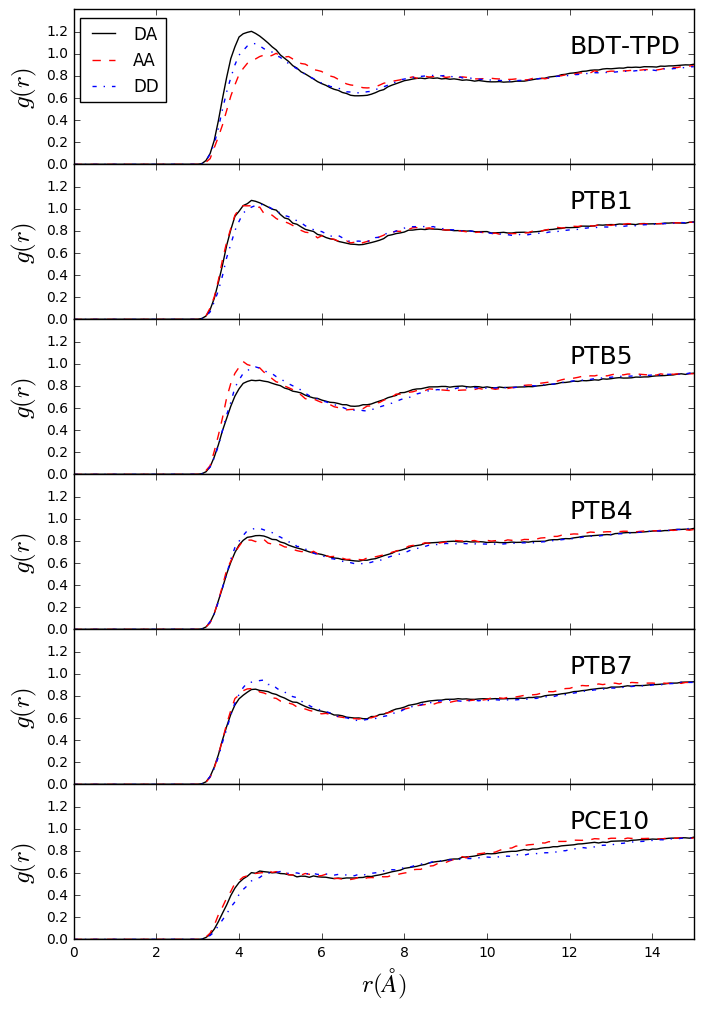

In [60]:
os.chdir('/Users/tkemper/Projects/DApolymers/figures')
ms = 3
led_x = 0.015
led_y = 0.001
fontsz_leg = 12
fontsz_text = 18


fig, ax = plt.subplots(6,sharex=True)
#ax.plot(rgy_sq_vals.bin_val,rgy_sq_vals.hist_bin)
#ax.bar(rgy_sq_vals.bins_cent, rgy_sq_vals.hist_cent , align='center', width=rgy_sq_vals.bin_size)
i = 0
for name_i in name_l:
    calc_i = None 
    for tag_i,calc_o in proj_i.calculations.iteritems():
        if( calc_o.properties['name'] == name_i  ):
            calc_i = calc_o



    print calc_i.properties['name']
    
    ax[i].plot(calc_i.rdf_DA['r'],calc_i.rdf_DA['g_r'],'-k',label=r'DA',ms=ms)
    ax[i].plot(calc_i.rdf_DA['r'],calc_i.rdf_AA['g_r'],'--r',label=r'AA',ms=ms)
    ax[i].plot(calc_i.rdf_DA['r'],calc_i.rdf_DD['g_r'],'-.b',label=r'DD',ms=ms)


    

    ax[i].set_xlim(0,15.0)
    ax[i].set_ylim(0.0,1.40)
    ax[i].text(12.0,1.0,name_i,fontsize=fontsz_text)    
    ax[i].set_ylabel(r'$g(r)$',fontsize=fontsz_text)


    labels=ax[i].get_yticks().tolist()
    labels[-1]=''
    ax[i].set_yticklabels(labels)    

    i += 1 

ax[i-1].set_xlabel(r'$r (\AA)$',fontsize=fontsz_text)
    
ax[0].legend(loc=(0.01,0.40),prop={'size':fontsz_leg})
fig.subplots_adjust(hspace=0.0)   
fig.set_size_inches(8.0, 12.0)

        

fig.savefig('gr_v1.pdf',format='pdf')    

BDT-TPD
PTB1
PTB5
PTB4
PTB7
PCE10
BDT-TPD
PTB1
PTB5
PTB4
PTB7
PCE10
BDT-TPD
PTB1
PTB5
PTB4
PTB7
PCE10


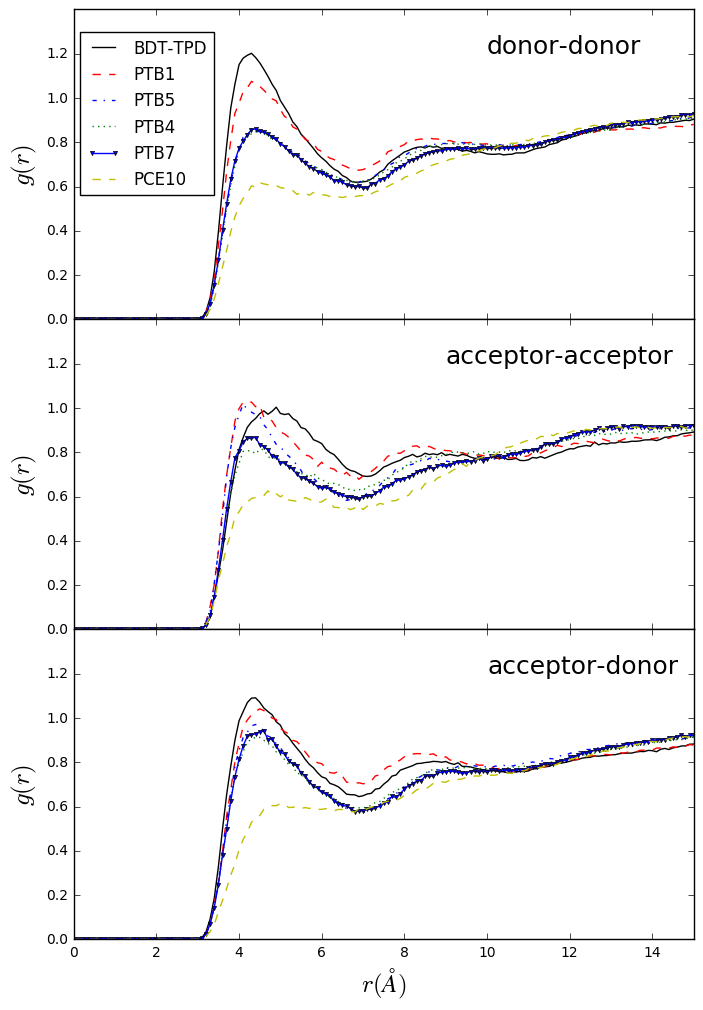

In [67]:
os.chdir('/Users/tkemper/Projects/DApolymers/figures')
ms = 3
led_x = 0.015
led_y = 0.001
fontsz_leg = 12
fontsz_text = 18

ltypes = ['-k','--r','-.b',':g','-v','--y']

fig, ax = plt.subplots(3,sharex=True)
#ax.plot(rgy_sq_vals.bin_val,rgy_sq_vals.hist_bin)
#ax.bar(rgy_sq_vals.bins_cent, rgy_sq_vals.hist_cent , align='center', width=rgy_sq_vals.bin_size)
i = 0
j = 0 
for name_i in name_l:
    calc_i = None 
    for tag_i,calc_o in proj_i.calculations.iteritems():
        if( calc_o.properties['name'] == name_i  ):
            calc_i = calc_o
    print calc_i.properties['name']    
    ax[i].plot(calc_i.rdf_DA['r'],calc_i.rdf_DA['g_r'],ltypes[j],label=name_i,ms=ms)
    j += 1
    
ax[i].set_xlim(0,15.0)
ax[i].set_ylim(0.0,1.40)
ax[i].text(10.0,1.2,'donor-donor',fontsize=fontsz_text)    
ax[i].set_ylabel(r'$g(r)$',fontsize=fontsz_text)


labels=ax[i].get_yticks().tolist()
labels[-1]=''
ax[i].set_yticklabels(labels)    

i += 1 
j = 0 
for name_i in name_l:
    calc_i = None 
    for tag_i,calc_o in proj_i.calculations.iteritems():
        if( calc_o.properties['name'] == name_i  ):
            calc_i = calc_o
    print calc_i.properties['name']        
    ax[i].plot(calc_i.rdf_AA['r'],calc_i.rdf_AA['g_r'],ltypes[j],label=name_i,ms=ms)
    j += 1

    
ax[i].set_xlim(0,15.0)
ax[i].set_ylim(0.0,1.40)
ax[i].text(9.0,1.2,'acceptor-acceptor',fontsize=fontsz_text)    
ax[i].set_ylabel(r'$g(r)$',fontsize=fontsz_text)


labels=ax[i].get_yticks().tolist()
labels[-1]=''
ax[i].set_yticklabels(labels)    

i += 1 
j = 0 
for name_i in name_l:
    calc_i = None 
    for tag_i,calc_o in proj_i.calculations.iteritems():
        if( calc_o.properties['name'] == name_i  ):
            calc_i = calc_o
    print calc_i.properties['name']        
    ax[i].plot(calc_i.rdf_DD['r'],calc_i.rdf_DD['g_r'],ltypes[j],label=name_i,ms=ms)
    j += 1

    
ax[i].set_xlim(0,15.0)
ax[i].set_ylim(0.0,1.40)
ax[i].text(10.0,1.2,'acceptor-donor',fontsize=fontsz_text)    
ax[i].set_ylabel(r'$g(r)$',fontsize=fontsz_text)


labels=ax[i].get_yticks().tolist()
labels[-1]=''
ax[i].set_yticklabels(labels)    

i += 1 

ax[i-1].set_xlabel(r'$r (\AA)$',fontsize=fontsz_text)
ax[0].legend(loc=(0.01,0.40),prop={'size':fontsz_leg})
fig.subplots_adjust(hspace=0.0)
fig.set_size_inches(8.0, 12.0)

fig.savefig('gr_v2.pdf',format='pdf')    

In [141]:
calc_i = proj_i.calculations['D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_rdf4']

In [143]:
os.chdir(calc_i.dir['launch'])

calc_i.rdf_AA = read_dat('A_A_fs100.dat')
calc_i.rdf_NN = read_dat('AffNS_AffNS_fs100.dat')
calc_i.rdf_OO = read_dat('AffO_AffO_fs100.dat')  
calc_i.rdf_SS = read_dat('AffS_AffS_fs100.dat')





PTB1


AttributeError: 'CalculationRes' object has no attribute 'rdf_AA'

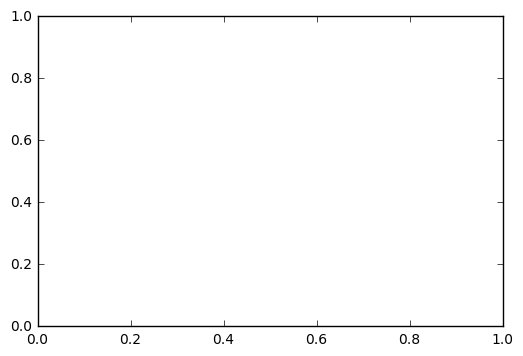

In [158]:
os.chdir('/Users/tkemper/Projects/DApolymers/figures')
ms = 3
led_x = 0.015
led_y = 0.001
fontsz_leg = 14
fontsz_text = 18

ltypes = ['-k','--r','-.b',':g','-v','--y']

fig, ax = plt.subplots(1,sharex=True)

print calc_i.properties['name']

ax.plot(calc_i.rdf_AA['r'],calc_i.rdf_AA['g_r'],ltypes[0],label=r'A-A',ms=ms)
ax.plot(calc_i.rdf_NN['r'],calc_i.rdf_NN['g_r'],ltypes[1],label=r'N-N',ms=ms)
ax.plot(calc_i.rdf_OO['r'],calc_i.rdf_OO['g_r'],ltypes[2],label=r'O-O',ms=ms)
ax.plot(calc_i.rdf_SS['r'],calc_i.rdf_SS['g_r'],ltypes[3],label=r'S-S',ms=ms)

ax.set_xlim(0,15.0)
ax.set_ylim(0.0,2.50)
ax.text(10.0,1.2,'acceptor-donor',fontsize=fontsz_text)    
ax.set_ylabel(r'$g(r)$',fontsize=fontsz_text)


#labels=ax[i].get_yticks().tolist()
#labels[-1]=''
#ax[i].set_yticklabels(labels)    

i += 1 

ax.set_xlabel(r'$r (\AA)$',fontsize=fontsz_text)
ax.legend(loc=(0.01,0.40),prop={'size':fontsz_leg})
fig.subplots_adjust(hspace=0.0)
fig.set_size_inches(8.0, 4.0)

fig.savefig('gr_BDTTPDv1.pdf',format='pdf')    

In [84]:
proj_i.dir['notebook'] = '/Users/tkemper/Projects/DApolymers/notebooks'
for tag,calc_i in proj_i.calculations.iteritems():
    calc_i.dir['notebook'] = '/Users/tkemper/Projects/DApolymers/notebooks'

In [85]:
for tag,calc_i in proj_i.calculations.iteritems():
    os.chdir(calc_i.dir['notebook'])
    calc_i.dump_json()
os.chdir(proj_i.dir['notebook'])
proj_i.dump_json()

{'files': {u'templates': {u'run': u'streamm_peregrine.pbs', u'compressed': u'D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_rdf4_templates.tgz'}, u'input': {u'cply': u'D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173.cply', u'py_script': u'rdf2.py', u'compressed': u'D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_rdf4_input.tgz', u'file_D': u'D.list', u'file_DA': u'DA.list', u'file_A': u'A.list'}, u'output': {u'A_A_fs100_log': u'A_A_fs100.log', u'D_D_fs100_data': u'D_D_fs100.dat', u'D_A_fs100_log': u'D_A_fs100.log', u'D_A_fs100_data': u'D_A_fs100.dat', u'D_D_fs100_log': u'D_D_fs100.log', u'A_A_fs100_data': u'A_A_fs100.dat'}, u'data': {}, u'scripts': {u'run_D_A_fs100': u'D_A_fs100.pbs', u'run_A_A_fs100': u'A_A_fs100.pbs', u'compressed': u'D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_rdf4_scripts.tgz', u'run_D_D_fs100': u'D_D_fs100.pbs'}}, 'meta': {u'date': u'2016-12-29T12:18:09.776919', u'status': u'running', u'resource': u'peregr

Recalculate rdf with smaller frame step of 10 frames 

In [41]:
os.chdir('/Users/tkemper/Projects/DApolymers/notebooks')

In [42]:
proj_j_tag = 'rdf5'
proj_j = project.Project('DAPpolymers_%s'%(proj_j_tag))
proj_j.load_json()

In [44]:
print proj_j.calculations

{}


In [43]:
for tag,calc_i in proj_j.calculations.iteritems():
    run_tag = "A_A" #%(calc_i.properties['frame_step'])
    calc_i.files['output']["log"] = "%s.log"%(run_tag)




In [45]:
for tag,calc_ref in proj_ref.calculations.iteritems():
    print tag
    calc_i = make_rdfcalc(calc_ref,proj_j_tag)
    proj_j.calculations[calc_i.tag] = copy.deepcopy(calc_i)

D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_rdf1
MAKEDIR  ssh tkemper@peregrine.hpc.nrel.gov '   mkdir -p /mss/users/tkemper/D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_rdf5/   ' 
MAKEDIR  ssh tkemper@peregrine.hpc.nrel.gov '   mkdir -p /scratch/tkemper/D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_rdf5/   ' 
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_rdf1
MAKEDIR  ssh tkemper@peregrine.hpc.nrel.gov '   mkdir -p /mss/users/tkemper/D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_rdf5/   ' 
MAKEDIR  ssh tkemper@peregrine.hpc.nrel.gov '   mkdir -p /scratch/tkemper/D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_rdf5/   ' 
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_rdf1
MAKEDIR  ssh tkemper@peregrine.hpc.nrel.gov '   mkdir -p /mss/users/tkemper/D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_rdf5/   ' 
MAKEDIR  ssh tkemper@peregrine.hpc.nrel.gov '   mkdir -p /scratch/tkemper/D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_rdf5/   '

In [46]:
for tag,calc_i in proj_j.calculations.iteritems():
    print tag
    calc_i.meta['status']  = 'written'
    calc_i.set_resource(peregrine)
    calc_i.properties['scratch'] = calc_i.dir['scratch']



    print calc_i.meta['status'] 

D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_rdf5
written
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_rdf5
written
D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_rdf5
written
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_rdf5
written
D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_rdf5
written
D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_rdf5
written


In [47]:
for tag,calc_i in proj_j.calculations.iteritems():
    print tag
    if( calc_i.meta['status'] != 'running' ):
        os.chdir(calc_i.dir['launch'])

        part_df,res_D,res_A = find_DA(calc_i)

        print res_D,res_A

        sel_D = part_df['resname'] == res_D
        sel_A = part_df['resname'] == res_A
        sel_THIO = part_df['resname'] == 'THIO'

        syC = part_df['symbol'] == 'C'
        syS = part_df['symbol'] == 'S'
        syN = part_df['symbol'] == 'N'
        ffO = part_df['fftype'] == 'O'    

        calc_i.sel_DA = part_df[(syC | syS  |syN ) & (sel_D | sel_A )]
        calc_i.strucC.write_xyz_list(calc_i.sel_DA.index,'sel_DA.xyz')    
        calc_i.sel_D = part_df[(syC | syS  |syN ) & (sel_D  )]
        calc_i.strucC.write_xyz_list(calc_i.sel_D.index,'sel_D.xyz')    
        calc_i.sel_A = part_df[(syC | syS  |syN ) & ( sel_A )]
        calc_i.strucC.write_xyz_list(calc_i.sel_A.index,'sel_A.xyz')    

        file_DA = calc_i.strucC.write_list(calc_i.sel_DA.index,'DA')
        file_D = calc_i.strucC.write_list(calc_i.sel_D.index,'D')
        file_A = calc_i.strucC.write_list(calc_i.sel_A.index,'A')    



D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_rdf5
D1
THIO
R3
A23
R4
R41
D1 A23
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_rdf5
D1
R2
A23
R4
R41
D1 A23
D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_rdf5
D1
R2
A2
R3
R41
R40
D1 A2
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_rdf5
D1
R2
A23
R4
R41
R40
D1 A23
D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_rdf5
D1
R2
A31
R4
R41
R40
D1 A31
D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_rdf5
D1
R2
A31
R4
R40
R42
D1 A31


In [48]:
for tag,calc_i in proj_j.calculations.iteritems():
        print tag

        calc_i.files['input']['file_DA'] = 'DA.list'
        calc_i.files['input']['file_D'] = 'D.list'
        calc_i.files['input']['file_A'] = 'A.list'

D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_rdf5
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_rdf5
D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_rdf5
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_rdf5
D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_rdf5
D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_rdf5


In [49]:
for tag,calc_i in proj_j.calculations.iteritems():
    print tag

    calc_i.dir['templates'] = '/Users/tkemper/Development/streamm-tools/templates'
    calc_i.dir['scripts'] = '/Users/tkemper/Development/streamm-tools/scripts'    



D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_rdf5
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_rdf5
D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_rdf5
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_rdf5
D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_rdf5
D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_rdf5


In [50]:
for tag,calc_i in proj_j.calculations.iteritems():
    print tag
    #if( calc_i.meta['status'] != 'running' ):

    os.chdir(calc_i.dir['launch'])

    file_type = 'templates'
    file_key = 'run'
    file_name = "streamm_peregrine.pbs"
    from_dirkey = 'templates'
    to_dirkey = 'launch'
    calc_i.cp_file(file_type,file_key,file_name,from_dirkey,to_dirkey)

    file_type = 'input'
    file_key = 'py_script'
    file_name = "rdf2.py"
    from_dirkey = 'scripts'
    to_dirkey = 'launch'
    calc_i.cp_file(file_type,file_key,file_name,from_dirkey,to_dirkey)



D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_rdf5
> in cp_file  templates run streamm_peregrine.pbs templates launch
copying /Users/tkemper/Development/streamm-tools/templates/streamm_peregrine.pbs to /Users/tkemper/Projects/DApolymers/scratch/D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_rdf5/streamm_peregrine.pbs 
> in cp_file  input py_script rdf2.py scripts launch
copying /Users/tkemper/Development/streamm-tools/scripts/rdf2.py to /Users/tkemper/Projects/DApolymers/scratch/D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_rdf5/rdf2.py 
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_rdf5
> in cp_file  templates run streamm_peregrine.pbs templates launch
copying /Users/tkemper/Development/streamm-tools/templates/streamm_peregrine.pbs to /Users/tkemper/Projects/DApolymers/scratch/D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_rdf5/streamm_peregrine.pbs 
> in cp_file  input py_script rdf2.py scripts launch
copying /Users/tkemper/D

In [51]:
for tag,calc_i in proj_j.calculations.iteritems():
    print tag,calc_i.meta['status']
    calc_i.properties['frame_step'] = 10



D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_rdf5 written
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_rdf5 written
D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_rdf5 written
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_rdf5 written
D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_rdf5 written
D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_rdf5 written


In [52]:
for tag,calc_i in proj_j.calculations.iteritems():
     print calc_i.properties['frame_step']

10
10
10
10
10
10


In [53]:
for tag,calc_i in proj_j.calculations.iteritems():
        print tag
        # if( calc_i.meta['status'] != 'running' ):


        os.chdir(calc_i.dir['launch'])

        calc_i.properties['streamm_command'] = ' \n'

        run_tag = "D_D_fs%d"%(calc_i.properties['frame_step'])
        calc_i.properties['streamm_command'] = 'python %s  %s --cply %s'%(calc_i.files['input']['py_script'],run_tag,calc_i.files['input']['cply'])
        calc_i.properties['streamm_command'] += ' --list_i %s '%(calc_i.files['input']['file_D'])
        calc_i.properties['streamm_command'] += ' --list_j %s '%(calc_i.files['input']['file_D'])
        calc_i.properties['streamm_command'] += ' --dcd prod1_dump.dcd'
        calc_i.properties['streamm_command'] += ' --mol_inter'
        calc_i.properties['streamm_command'] += ' --frame_step %d'%(calc_i.properties['frame_step'])

        calc_i.files['output']["%s_log"%(run_tag)] = "%s.log"%(run_tag)
        calc_i.files['output']["%s_data"%(run_tag)] = "%s.dat"%(run_tag)

        print calc_i.properties['streamm_command']    


        calc_i.load_str('templates','run')
        calc_i.replacewrite_prop('run','scripts','run_%s'%(run_tag),'%s.pbs'%(run_tag))


        calc_i.properties['finish_str'] ='Finished'



        calc_i.properties['streamm_command'] = ' \n'
        run_tag = "D_A_fs%d"%(calc_i.properties['frame_step'])
        calc_i.properties['streamm_command'] += 'python %s  %s --cply %s'%(calc_i.files['input']['py_script'],run_tag,calc_i.files['input']['cply'])
        calc_i.properties['streamm_command'] += ' --list_i %s '%(calc_i.files['input']['file_D'])
        calc_i.properties['streamm_command'] += ' --list_j %s '%(calc_i.files['input']['file_A'])
        calc_i.properties['streamm_command'] += ' --dcd prod1_dump.dcd'
        calc_i.properties['streamm_command'] += ' --mol_inter'
        calc_i.properties['streamm_command'] += ' --frame_step %d'%(calc_i.properties['frame_step'])
        calc_i.files['output']["%s_log"%(run_tag)] = "%s.log"%(run_tag)
        calc_i.files['output']["%s_data"%(run_tag)] = "%s.dat"%(run_tag)


        print calc_i.properties['streamm_command']    


        calc_i.load_str('templates','run')
        calc_i.replacewrite_prop('run','scripts','run_%s'%(run_tag),'%s.pbs'%(run_tag))


        calc_i.properties['finish_str'] ='Finished'


        calc_i.properties['streamm_command'] = ' \n'
        run_tag = "A_A_fs%d"%(calc_i.properties['frame_step'])
        calc_i.properties['streamm_command'] += 'python %s  %s --cply %s'%(calc_i.files['input']['py_script'],run_tag,calc_i.files['input']['cply'])
        calc_i.properties['streamm_command'] += ' --list_i %s '%(calc_i.files['input']['file_A'])
        calc_i.properties['streamm_command'] += ' --list_j %s '%(calc_i.files['input']['file_A'])
        calc_i.properties['streamm_command'] += ' --dcd prod1_dump.dcd'
        calc_i.properties['streamm_command'] += ' --mol_inter'
        calc_i.properties['streamm_command'] += ' --frame_step %d'%(calc_i.properties['frame_step'])
        
        calc_i.files['output']["%s_log"%(run_tag)] = "%s.log"%(run_tag)
        calc_i.files['output']["%s_data"%(run_tag)] = "%s.dat"%(run_tag)


        print calc_i.properties['streamm_command']    


        calc_i.load_str('templates','run')
        calc_i.replacewrite_prop('run','scripts','run_%s'%(run_tag),'%s.pbs'%(run_tag))


        calc_i.properties['finish_str'] ='Finished'

        
        #return prod1_et

D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_rdf5
python rdf2.py  D_D_fs10 --cply D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173.cply --list_i D.list  --list_j D.list  --dcd prod1_dump.dcd --mol_inter --frame_step 10
 
python rdf2.py  D_A_fs10 --cply D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173.cply --list_i D.list  --list_j A.list  --dcd prod1_dump.dcd --mol_inter --frame_step 10
 
python rdf2.py  A_A_fs10 --cply D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173.cply --list_i A.list  --list_j A.list  --dcd prod1_dump.dcd --mol_inter --frame_step 10
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_rdf5
python rdf2.py  D_D_fs10 --cply D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193.cply --list_i D.list  --list_j D.list  --dcd prod1_dump.dcd --mol_inter --frame_step 10
 
python rdf2.py  D_A_fs10 --cply D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193.cply --list_i D.list  --list_j A.list  --dcd prod1_dump.dcd --mol_inter --frame_step 10
 
python 

In [54]:
for tag,calc_i in proj_j.calculations.iteritems():
    run_tag = "A_A_fs%d"%(calc_i.properties['frame_step'])
    calc_i.files['output']["log"] = "%s.log"%(run_tag)




In [ ]:
for tag,calc_i in proj_j.calculations.iteritems():
    try:
        del calc_i.files['scripts']['py_script']
    except:
        print "meh"

In [55]:
for tag,calc_i in proj_j.calculations.iteritems():
    print calc_i.files['scripts']

{'run_A_A_fs10': 'A_A_fs10.pbs', 'run_D_A_fs10': 'D_A_fs10.pbs', 'run_D_D_fs10': 'D_D_fs10.pbs'}
{'run_A_A_fs10': 'A_A_fs10.pbs', 'run_D_A_fs10': 'D_A_fs10.pbs', 'run_D_D_fs10': 'D_D_fs10.pbs'}
{'run_A_A_fs10': 'A_A_fs10.pbs', 'run_D_A_fs10': 'D_A_fs10.pbs', 'run_D_D_fs10': 'D_D_fs10.pbs'}
{'run_A_A_fs10': 'A_A_fs10.pbs', 'run_D_A_fs10': 'D_A_fs10.pbs', 'run_D_D_fs10': 'D_D_fs10.pbs'}
{'run_A_A_fs10': 'A_A_fs10.pbs', 'run_D_A_fs10': 'D_A_fs10.pbs', 'run_D_D_fs10': 'D_D_fs10.pbs'}
{'run_A_A_fs10': 'A_A_fs10.pbs', 'run_D_A_fs10': 'D_A_fs10.pbs', 'run_D_D_fs10': 'D_D_fs10.pbs'}


In [58]:
os.chdir('/Users/tkemper/Projects/DApolymers/notebooks')

In [59]:
proj_prod1_id = 'prod1'
proj_prod1 = project.Project('DAPpolymers_%s'%(proj_prod1_id))
proj_prod1.load_json()

Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 


In [60]:
for tag,calc_prod1 in proj_prod1.calculations.iteritems():
    print calc_prod1.tag #,calc_prod1.properties['name']

D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1
D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1
D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1
D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1


In [61]:
for tag,calc_i in proj_i.calculations.iteritems():

    print calc_i.tag

D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_rdf4
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_rdf4
D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_rdf4
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_rdf4
D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_rdf4
D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_rdf4


In [62]:
calc_i = proj_j.calculations['D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_rdf5']
calc_i.add_refcalc(proj_prod1.calculations['D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1'])
calc_i = proj_j.calculations['D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_rdf5']
calc_i.add_refcalc(proj_prod1.calculations['D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1'])
calc_i = proj_j.calculations['D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_rdf5']
calc_i.add_refcalc(proj_prod1.calculations['D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1'])
calc_i = proj_j.calculations['D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_rdf5']
calc_i.add_refcalc(proj_prod1.calculations['D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1'])
calc_i = proj_j.calculations['D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_rdf5']
calc_i.add_refcalc(proj_prod1.calculations['D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1'])
calc_i = proj_j.calculations['D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_rdf5']
calc_i.add_refcalc(proj_prod1.calculations['D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1'])

In [63]:
for tag_i,calc_ref in proj_ref.calculations.iteritems():
    print tag_i,calc_ref.meta['status'],calc_ref.properties['name']

D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_rdf1 written BDT-TPD
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_rdf1 written PCE10
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_rdf1 written PTB7
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_rdf1 written PTB4
D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_rdf1 written PTB1
D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_rdf1 written PTB5


In [156]:
for tag,calc_i in proj_j.calculations.iteritems():
    print tag
    #if( calc_i.meta['status'] != 'running' ):
    calc_i.meta['status'] = 'written'
    os.chdir(calc_i.dir['launch'])

    calc_i.push()

D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_rdf5
 Resource type ssh 
runnning push function in /Users/tkemper/Projects/DApolymers/scratch/D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_rdf5 
Compressing and copying input files to scratch directory 
Adding D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173.cply 
Adding D.list 
Adding DA.list 
Adding A.list 
Adding rdf2.py 
> compressed_file  D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_rdf5_input.tgz
COPY  scp /Users/tkemper/Projects/DApolymers/scratch/D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_rdf5/D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_rdf5_input.tgz tkemper@peregrine.hpc.nrel.gov:/scratch/tkemper/D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_rdf5/
Compressing and copying templates files to scratch directory 
Adding streamm_peregrine.pbs 
> compressed_file  D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_pro

Add other RDFs 

In [64]:
calc_i = proj_j.calculations['D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_rdf5']

In [65]:
calc_i.meta['status'] = 'written'

In [66]:
os.chdir(calc_i.dir['launch'])

In [67]:
os.chdir(calc_i.dir['launch'])

part_df,res_D,res_A = find_DA(calc_i)

print res_D,res_A

D1
R2
A2
R3
R41
R40
D1 A2


In [68]:
part_df,res_D,res_A = find_DA(calc_i)

sel_D = part_df['resname'] == res_D
sel_A = part_df['resname'] == res_A
sel_THIO = part_df['resname'] == 'THIO'

syC = part_df['symbol'] == 'C'
syS = part_df['symbol'] == 'S'
syN = part_df['symbol'] == 'N'
ffO = part_df['fftype'] == 'O'   

ffO = part_df['fftype'] == 'O'    
ffS = part_df['fftype'] == 'S'        
ffNS = part_df['fftype'] == 'NS'   

D1
R2
A2
R3
R41
R40


In [69]:
    calc_i.sel_AffO = part_df[( ffO ) & ( sel_A )]
    calc_i.strucC.write_xyz_list(calc_i.sel_AffO.index,'sel_AffO.xyz')   
    file_AffO = calc_i.strucC.write_list(calc_i.sel_AffO.index,'AffO')    
    calc_i.files['input']['file_AffO'] = file_AffO   

    calc_i.sel_AffS = part_df[( ffS ) & ( sel_A )]
    calc_i.strucC.write_xyz_list(calc_i.sel_AffS.index,'sel_AffS.xyz')   
    file_AffS = calc_i.strucC.write_list(calc_i.sel_AffS.index,'AffS')    
    calc_i.files['input']['file_AffS'] = file_AffS   

    calc_i.sel_AffNS = part_df[( ffNS ) & ( sel_A )]
    calc_i.strucC.write_xyz_list(calc_i.sel_AffNS.index,'sel_AffNS.xyz')   
    file_AffNS = calc_i.strucC.write_list(calc_i.sel_AffNS.index,'AffNS')    
    calc_i.files['input']['file_AffNS'] = file_AffNS   

In [70]:
    calc_i.files['scripts_t'] =  calc_i.files['scripts']

In [ ]:
    del  calc_i.files['scripts']

In [ ]:
    calc_i.files['scripts'] = {}

In [ ]:
    print  calc_i.files['scripts']

In [71]:
        calc_i.properties['streamm_command'] = ' \n'

        run_tag = "AffO_AffO_fs%d"%(calc_i.properties['frame_step'])
        calc_i.properties['streamm_command'] = 'python %s  %s --cply %s'%(calc_i.files['input']['py_script'],run_tag,calc_i.files['input']['cply'])
        calc_i.properties['streamm_command'] += ' --list_i %s '%(calc_i.files['input']['file_AffO'])
        calc_i.properties['streamm_command'] += ' --list_j %s '%(calc_i.files['input']['file_AffO'])
        calc_i.properties['streamm_command'] += ' --dcd prod1_dump.dcd'
        calc_i.properties['streamm_command'] += ' --mol_inter'
        calc_i.properties['streamm_command'] += ' --frame_step %d'%(calc_i.properties['frame_step'])

        calc_i.files['output']["%s_log"%(run_tag)] = "%s.log"%(run_tag)
        calc_i.files['output']["%s_data"%(run_tag)] = "%s.dat"%(run_tag)

        print calc_i.properties['streamm_command']    


        calc_i.load_str('templates','run')
        calc_i.replacewrite_prop('run','scripts','run_%s'%(run_tag),'%s.pbs'%(run_tag))


        calc_i.properties['finish_str'] ='Finished'

        run_tag = "AffS_AffS_fs%d"%(calc_i.properties['frame_step'])
        calc_i.properties['streamm_command'] = 'python %s  %s --cply %s'%(calc_i.files['input']['py_script'],run_tag,calc_i.files['input']['cply'])
        calc_i.properties['streamm_command'] += ' --list_i %s '%(calc_i.files['input']['file_AffS'])
        calc_i.properties['streamm_command'] += ' --list_j %s '%(calc_i.files['input']['file_AffS'])
        calc_i.properties['streamm_command'] += ' --dcd prod1_dump.dcd'
        calc_i.properties['streamm_command'] += ' --mol_inter'
        calc_i.properties['streamm_command'] += ' --frame_step %d'%(calc_i.properties['frame_step'])

        calc_i.files['output']["%s_log"%(run_tag)] = "%s.log"%(run_tag)
        calc_i.files['output']["%s_data"%(run_tag)] = "%s.dat"%(run_tag)

        print calc_i.properties['streamm_command']    


        calc_i.load_str('templates','run')
        calc_i.replacewrite_prop('run','scripts','run_%s'%(run_tag),'%s.pbs'%(run_tag))


        calc_i.properties['finish_str'] ='Finished'


        run_tag = "AffNS_AffNS_fs%d"%(calc_i.properties['frame_step'])
        calc_i.properties['streamm_command'] = 'python %s  %s --cply %s'%(calc_i.files['input']['py_script'],run_tag,calc_i.files['input']['cply'])
        calc_i.properties['streamm_command'] += ' --list_i %s '%(calc_i.files['input']['file_AffNS'])
        calc_i.properties['streamm_command'] += ' --list_j %s '%(calc_i.files['input']['file_AffNS'])
        calc_i.properties['streamm_command'] += ' --dcd prod1_dump.dcd'
        calc_i.properties['streamm_command'] += ' --mol_inter'
        calc_i.properties['streamm_command'] += ' --frame_step %d'%(calc_i.properties['frame_step'])

        calc_i.files['output']["%s_log"%(run_tag)] = "%s.log"%(run_tag)
        calc_i.files['output']["%s_data"%(run_tag)] = "%s.dat"%(run_tag)

        print calc_i.properties['streamm_command']    


        calc_i.load_str('templates','run')
        calc_i.replacewrite_prop('run','scripts','run_%s'%(run_tag),'%s.pbs'%(run_tag))


        calc_i.properties['finish_str'] ='Finished'

        
        run_tag = "AffNS_AffS_fs%d"%(calc_i.properties['frame_step'])
        calc_i.properties['streamm_command'] = 'python %s  %s --cply %s'%(calc_i.files['input']['py_script'],run_tag,calc_i.files['input']['cply'])
        calc_i.properties['streamm_command'] += ' --list_i %s '%(calc_i.files['input']['file_AffNS'])
        calc_i.properties['streamm_command'] += ' --list_j %s '%(calc_i.files['input']['file_AffS'])
        calc_i.properties['streamm_command'] += ' --dcd prod1_dump.dcd'
        calc_i.properties['streamm_command'] += ' --mol_inter'
        calc_i.properties['streamm_command'] += ' --frame_step %d'%(calc_i.properties['frame_step'])

        calc_i.files['output']["%s_log"%(run_tag)] = "%s.log"%(run_tag)
        calc_i.files['output']["%s_data"%(run_tag)] = "%s.dat"%(run_tag)

        print calc_i.properties['streamm_command']    


        calc_i.load_str('templates','run')
        calc_i.replacewrite_prop('run','scripts','run_%s'%(run_tag),'%s.pbs'%(run_tag))


        calc_i.properties['finish_str'] ='Finished'







python rdf2.py  AffO_AffO_fs10 --cply D1_R2R200_A2_R3_R200R200R201_n5_x197.cply --list_i AffO.list  --list_j AffO.list  --dcd prod1_dump.dcd --mol_inter --frame_step 10
python rdf2.py  AffS_AffS_fs10 --cply D1_R2R200_A2_R3_R200R200R201_n5_x197.cply --list_i AffS.list  --list_j AffS.list  --dcd prod1_dump.dcd --mol_inter --frame_step 10
python rdf2.py  AffNS_AffNS_fs10 --cply D1_R2R200_A2_R3_R200R200R201_n5_x197.cply --list_i AffNS.list  --list_j AffNS.list  --dcd prod1_dump.dcd --mol_inter --frame_step 10
python rdf2.py  AffNS_AffS_fs10 --cply D1_R2R200_A2_R3_R200R200R201_n5_x197.cply --list_i AffNS.list  --list_j AffS.list  --dcd prod1_dump.dcd --mol_inter --frame_step 10


In [72]:
        run_tag = "AffO_AffO_fs%d"%(calc_i.properties['frame_step'])

        calc_i.files['output']["%s_log"%(run_tag)] = "%s.log"%(run_tag)
        calc_i.files['output']["%s_data"%(run_tag)] = "%s.dat"%(run_tag)

        run_tag = "AffS_AffS_fs%d"%(calc_i.properties['frame_step'])

        calc_i.files['output']["%s_log"%(run_tag)] = "%s.log"%(run_tag)
        calc_i.files['output']["%s_data"%(run_tag)] = "%s.dat"%(run_tag)

        run_tag = "AffNS_AffNS_fs%d"%(calc_i.properties['frame_step'])

        calc_i.files['output']["%s_log"%(run_tag)] = "%s.log"%(run_tag)
        calc_i.files['output']["%s_data"%(run_tag)] = "%s.dat"%(run_tag)

In [152]:
    calc_i.push()

 Resource type ssh 
runnning push function in /Users/tkemper/Projects/DApolymers/figures 
Compressing and copying input files to scratch directory 
Adding AffS.list 
Adding AffNS.list 
Adding D1_R2R200_A2_R3_R200R200R201_n5_x197.cply 
Adding AffO.list 
Adding rdf2.py 
Adding D.list 
Adding DA.list 
Adding A.list 
> compressed_file  D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_rdf5_input.tgz
COPY  scp /Users/tkemper/Projects/DApolymers/scratch/D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_rdf5/D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_rdf5_input.tgz tkemper@peregrine.hpc.nrel.gov:/scratch/tkemper/D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_rdf5/
Compressing and copying templates files to scratch directory 
Adding streamm_peregrine.pbs 
> compressed_file  D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_rdf5_templates.tgz
COPY  scp /Users/tkemper/Projects/DApolymers/scratch/D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_rdf5/D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_rdf5_templates.tgz tkemper@peregrin

In [154]:
for tag,calc_i in proj_j.calculations.iteritems():
    print tag
    print calc_i.meta['status']

D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_rdf5
written
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_rdf5
written
D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_rdf5
written
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_rdf5
written
D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_rdf5
written
D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_rdf5
written


In [157]:
for tag,calc_i in proj_j.calculations.iteritems():
    print tag
    if( calc_i.meta['status'] != 'running' ):
        calc_i.run()
        print calc_i.meta['status']

D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_rdf5
Calculation with status written 
Resource type ssh 
Executing run command ssh tkemper@peregrine.hpc.nrel.gov ' cd /scratch/tkemper/D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_rdf5/ ; qsub A_A_fs10.pbs '  
Executing run command ssh tkemper@peregrine.hpc.nrel.gov ' cd /scratch/tkemper/D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_rdf5/ ; qsub D_A_fs10.pbs '  
Executing run command ssh tkemper@peregrine.hpc.nrel.gov ' cd /scratch/tkemper/D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_rdf5/ ; qsub D_D_fs10.pbs '  
written
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_rdf5
Calculation with status written 
Resource type ssh 
Executing run command ssh tkemper@peregrine.hpc.nrel.gov ' cd /scratch/tkemper/D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_rdf5/ ; qsub A_A_fs10.pbs '  
Executing run command ssh tkemper@peregrine.hpc.nrel.gov ' cd /scratch/tkemper/D1_R2R200

In [74]:
for tag,calc_i in proj_j.calculations.iteritems():
    calc_i.check()
    print calc_i.meta['status']
    


finished
finished
finished
finished
finished
finished


In [75]:
for tag,calc_i in proj_j.calculations.iteritems():
    calc_i.store()



runnning store function in /Users/tkemper/Projects/DApolymers/scratch/D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_rdf5 
Storing input files 
Adding D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173.cply 
Adding D.list 
Adding DA.list 
Adding A.list 
Adding rdf2.py 
> compressed_file  D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_rdf5_input.tgz
ssh tkemper@peregrine.hpc.nrel.gov ' cd /scratch/tkemper/D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_rdf5/ ; tar -czf  D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_rdf5_input.tgz  D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173.cply D.list DA.list A.list rdf2.py  ' 
ssh tkemper@peregrine.hpc.nrel.gov ' cd /scratch/tkemper/D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_rdf5/ ; cp /scratch/tkemper/D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_rdf5/D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_rdf5_input.tgz /mss/users/tkemper/D51_0

In [76]:
for tag,calc_i in proj_j.calculations.iteritems():
    calc_i.pull()



output D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_rdf5_output.tgz
bash_command  scp tkemper@peregrine.hpc.nrel.gov:/scratch/tkemper/D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_rdf5/D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_rdf5_output.tgz /Users/tkemper/Projects/DApolymers/scratch/D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_rdf5/ 


No commpressed files for file type data with key compressed 
output D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_rdf5_output.tgz
bash_command  scp tkemper@peregrine.hpc.nrel.gov:/scratch/tkemper/D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_rdf5/D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_rdf5_output.tgz /Users/tkemper/Projects/DApolymers/scratch/D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_rdf5/ 


No commpressed files for file type data with key compressed 
output D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_rdf5_output.tgz
bash_command  scp tkemper@peregrine.hpc.nrel.gov:/scratch/tkemper/D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_rdf5/D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_rdf5_output.tgz /Users/tkemper/Projects/DApolymers/scratch/D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_rdf5/ 


No commpressed files for file type data with key compressed 
output D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_rdf5_output.tgz
bash_command  scp tkemper@peregrine.hpc.nrel.gov:/scratch/tkemper/D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_rdf5/D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_rdf5_output.tgz /Users/tkemper/Projects/DApolymers/scratch/D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_rdf5/ 


No commpressed files for file type data with key compressed 
output D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_rdf5_output.tgz
bash_command  scp tkemper@peregrine.hpc.nrel.gov:/scratch/tkemper/D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_rdf5/D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_rdf5_output.tgz /Users/tkemper/Projects/DApolymers/scratch/D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_rdf5/ 


No commpressed files for file type data with key compressed 
output D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_rdf5_output.tgz
bash_command  scp tkemper@peregrine.hpc.nrel.gov:/scratch/tkemper/D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_rdf5/D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_rdf5_output.tgz /Users/tkemper/Projects/DApolymers/scratch/D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_rdf5/ 


No commpressed files for file type data with key compressed 


In [80]:
print calc_i.files['output']

{'D_D_fs10_data': 'D_D_fs10.dat', 'A_A_fs10_log': 'A_A_fs10.log', 'D_A_fs10_log': 'D_A_fs10.log', 'log': 'A_A_fs10.log', 'A_A_fs10_data': 'A_A_fs10.dat', 'D_D_fs10_log': 'D_D_fs10.log', 'compressed': 'D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_rdf5_output.tgz', 'D_A_fs10_data': 'D_A_fs10.dat'}


In [87]:
for tag,calc_i in proj_j.calculations.iteritems():
    os.chdir(calc_i.dir['launch'])
    print calc_i.dir['launch']
    calc_i.rdf_DA = read_dat(calc_i.files['output']['D_A_fs10_data'])
    calc_i.rdf_DD = read_dat(calc_i.files['output']['D_D_fs10_data'])
    calc_i.rdf_AA = read_dat(calc_i.files['output']['A_A_fs10_data'])    

/Users/tkemper/Projects/DApolymers/scratch/D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_rdf5/
/Users/tkemper/Projects/DApolymers/scratch/D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_rdf5/
/Users/tkemper/Projects/DApolymers/scratch/D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_rdf5/
/Users/tkemper/Projects/DApolymers/scratch/D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_rdf5/
/Users/tkemper/Projects/DApolymers/scratch/D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_rdf5/
/Users/tkemper/Projects/DApolymers/scratch/D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_rdf5/


BDT-TPD
PTB1
PTB5
PTB4
PTB7
PCE10


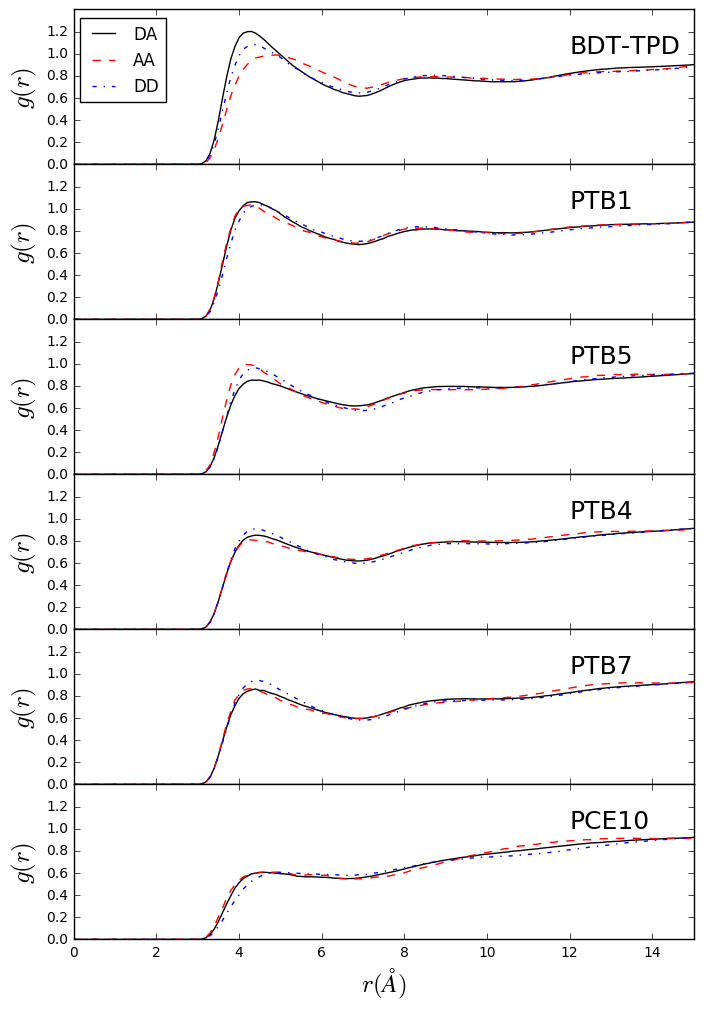

In [88]:
os.chdir('/Users/tkemper/Projects/DApolymers/figures')
ms = 3
led_x = 0.015
led_y = 0.001
fontsz_leg = 12
fontsz_text = 18


fig, ax = plt.subplots(6,sharex=True)
#ax.plot(rgy_sq_vals.bin_val,rgy_sq_vals.hist_bin)
#ax.bar(rgy_sq_vals.bins_cent, rgy_sq_vals.hist_cent , align='center', width=rgy_sq_vals.bin_size)
i = 0
for name_i in name_l:
    calc_i = None 
    for tag_i,calc_o in proj_j.calculations.iteritems():
        if( calc_o.properties['name'] == name_i  ):
            calc_i = calc_o



    print calc_i.properties['name']
    
    ax[i].plot(calc_i.rdf_DA['r'],calc_i.rdf_DA['g_r'],'-k',label=r'DA',ms=ms)
    ax[i].plot(calc_i.rdf_DA['r'],calc_i.rdf_AA['g_r'],'--r',label=r'AA',ms=ms)
    ax[i].plot(calc_i.rdf_DA['r'],calc_i.rdf_DD['g_r'],'-.b',label=r'DD',ms=ms)


    

    ax[i].set_xlim(0,15.0)
    ax[i].set_ylim(0.0,1.40)
    ax[i].text(12.0,1.0,name_i,fontsize=fontsz_text)    
    ax[i].set_ylabel(r'$g(r)$',fontsize=fontsz_text)


    labels=ax[i].get_yticks().tolist()
    labels[-1]=''
    ax[i].set_yticklabels(labels)    

    i += 1 

ax[i-1].set_xlabel(r'$r (\AA)$',fontsize=fontsz_text)
    
ax[0].legend(loc=(0.01,0.40),prop={'size':fontsz_leg})
fig.subplots_adjust(hspace=0.0)   
fig.set_size_inches(8.0, 12.0)

        

fig.savefig('gr_fs10_v1.pdf',format='pdf')    

BDT-TPD
PTB1
PTB5
PTB4
PTB7
PCE10
BDT-TPD
PTB1
PTB5
PTB4
PTB7
PCE10
BDT-TPD
PTB1
PTB5
PTB4
PTB7
PCE10


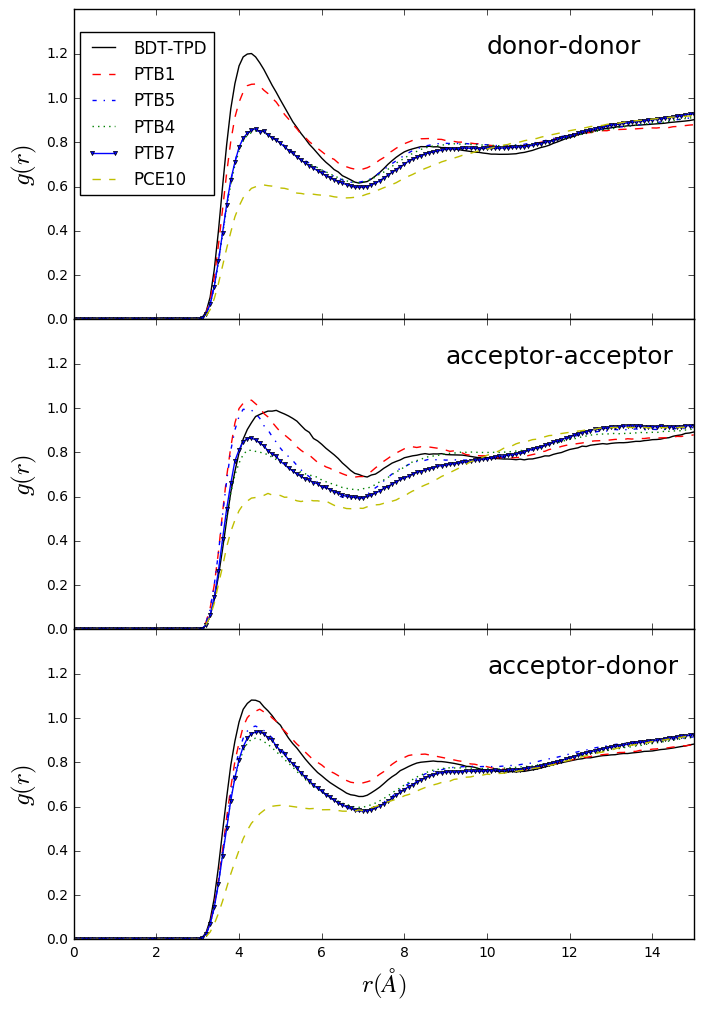

In [89]:
os.chdir('/Users/tkemper/Projects/DApolymers/figures')
ms = 3
led_x = 0.015
led_y = 0.001
fontsz_leg = 12
fontsz_text = 18

ltypes = ['-k','--r','-.b',':g','-v','--y']

fig, ax = plt.subplots(3,sharex=True)
#ax.plot(rgy_sq_vals.bin_val,rgy_sq_vals.hist_bin)
#ax.bar(rgy_sq_vals.bins_cent, rgy_sq_vals.hist_cent , align='center', width=rgy_sq_vals.bin_size)
i = 0
j = 0 
for name_i in name_l:
    calc_i = None 
    for tag_i,calc_o in proj_j.calculations.iteritems():
        if( calc_o.properties['name'] == name_i  ):
            calc_i = calc_o
    print calc_i.properties['name']    
    ax[i].plot(calc_i.rdf_DA['r'],calc_i.rdf_DA['g_r'],ltypes[j],label=name_i,ms=ms)
    j += 1
    
ax[i].set_xlim(0,15.0)
ax[i].set_ylim(0.0,1.40)
ax[i].text(10.0,1.2,'donor-donor',fontsize=fontsz_text)    
ax[i].set_ylabel(r'$g(r)$',fontsize=fontsz_text)


labels=ax[i].get_yticks().tolist()
labels[-1]=''
ax[i].set_yticklabels(labels)    

i += 1 
j = 0 
for name_i in name_l:
    calc_i = None 
    for tag_i,calc_o in proj_j.calculations.iteritems():
        if( calc_o.properties['name'] == name_i  ):
            calc_i = calc_o
    print calc_i.properties['name']        
    ax[i].plot(calc_i.rdf_AA['r'],calc_i.rdf_AA['g_r'],ltypes[j],label=name_i,ms=ms)
    j += 1

    
ax[i].set_xlim(0,15.0)
ax[i].set_ylim(0.0,1.40)
ax[i].text(9.0,1.2,'acceptor-acceptor',fontsize=fontsz_text)    
ax[i].set_ylabel(r'$g(r)$',fontsize=fontsz_text)


labels=ax[i].get_yticks().tolist()
labels[-1]=''
ax[i].set_yticklabels(labels)    

i += 1 
j = 0 
for name_i in name_l:
    calc_i = None 
    for tag_i,calc_o in proj_j.calculations.iteritems():
        if( calc_o.properties['name'] == name_i  ):
            calc_i = calc_o
    print calc_i.properties['name']        
    ax[i].plot(calc_i.rdf_DD['r'],calc_i.rdf_DD['g_r'],ltypes[j],label=name_i,ms=ms)
    j += 1

    
ax[i].set_xlim(0,15.0)
ax[i].set_ylim(0.0,1.40)
ax[i].text(10.0,1.2,'acceptor-donor',fontsize=fontsz_text)    
ax[i].set_ylabel(r'$g(r)$',fontsize=fontsz_text)


labels=ax[i].get_yticks().tolist()
labels[-1]=''
ax[i].set_yticklabels(labels)    

i += 1 

ax[i-1].set_xlabel(r'$r (\AA)$',fontsize=fontsz_text)
ax[0].legend(loc=(0.01,0.40),prop={'size':fontsz_leg})
fig.subplots_adjust(hspace=0.0)
fig.set_size_inches(8.0, 12.0)

fig.savefig('gr_v2.pdf',format='pdf')    

In [86]:
proj_j.dir['notebook'] = '/Users/tkemper/Projects/DApolymers/notebooks'
for tag,calc_i in proj_j.calculations.iteritems():
    calc_i.dir['notebook'] = '/Users/tkemper/Projects/DApolymers/notebooks'

In [87]:
for tag,calc_i in proj_j.calculations.iteritems():
    os.chdir(calc_i.dir['notebook'])
    calc_i.dump_json()
os.chdir(proj_j.dir['notebook'])
proj_i.dump_json()

{'files': {u'templates': {u'run': u'streamm_peregrine.pbs', u'compressed': u'D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_rdf3_templates.tgz'}, u'input': {u'cply': u'D1_R2R200_A2_R3_R200R200R201_n5_x197.cply', u'py_script': u'rdf2.py', u'compressed': u'D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_rdf3_input.tgz', u'file_D': u'D.list', u'file_DA': u'DA.list', u'file_A': u'A.list'}, u'scripts': {u'run_A_A': u'A_A.pbs', u'run_D_D': u'D_D.pbs', u'run_D_A': u'D_A.pbs', u'run_DA_DA': u'DA_DA.pbs', u'compressed': u'D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_rdf3_scripts.tgz'}, u'data': {}, u'output': {u'A_A_log': 'A_A.log', u'DA_DA_data': u'DA_DA.dat', 'A_D_log': 'A_D.log', 'log': 'A_A.log', u'D_D_data': u'D_D.dat', 'D_D_dat': 'D_D.dat', u'A_A_data': u'A_A.dat', 'A_A_dat': 'A_A.dat', u'compressed': u'D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_rdf3_output.tgz', u'D_D_log': 'D_D.log', u'DA_DA_log': u'DA_DA.log', u'D_A_log': u'D_A.log', 'A_D_dat': 'A_D.dat', u'D_A_data': u'D_A.dat'}}, 'meta': {u'dat